# Load, translate Jpn to english

In [2]:
import pandas as pd
from pprint import pprint
from googletrans import Translator
from collections import Counter
import matplotlib.pyplot as plt
from pprint import pprint
import pickle

is_translated = True

def jpn2eng(jpn):
    try:
        eng = Translator().translate(str(jpn)).text
        return eng
    except Exception as e:
        return jpn

# Load data
df = pd.read_csv('data.csv')

# Load answers of pass, non-pass student
df_ans = df[['このESはES選考を通過しましたか','1その答え']]
df_yes = df_ans[df_ans['このESはES選考を通過しましたか'] == 'はい']
df_no = df_ans[df_ans['このESはES選考を通過しましたか'] == 'いいえ']
yes_ans = list(df_yes['1その答え'])
no_ans = list(df_no['1その答え'])

if not is_translated:
    yes_ans_eng = list([jpn2eng(x) for x in yes_ans])
    no_ans_eng = list([jpn2eng(x) for x in no_ans])

    pickle.dump(yes_ans_eng, open('yes_ans_eng.obj', 'wb'))
    pickle.dump(no_ans_eng, open('_ans_eng.obj', 'wb'))
    print("Load finish and dump to files")

In [5]:
df_es_result = df['このESはES選考を通過しましたか']
a = Counter(list(df_es_result))
print(a)


Counter({'はい': 454, 'いいえ': 20, nan: 4, '最終面接前に提出': 1, '提出しなかった。': 1, '面接のときに持っていく方式でした。形式も自由だったのでOpenESを使いました。': 1, '面接が決まってから提出したもの': 1})


In [37]:
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import nltk
sid = SentimentIntensityAnalyzer()

FILTERED_COMPANY_DIR = "filtered_companies"
files = [f for f in os.listdir(FILTERED_COMPANY_DIR)]

for file in files:
    print(file)
    df = pd.read_csv(os.path.join(FILTERED_COMPANY_DIR, file))
    for index, row in df.iterrows():
        ES_result = row['Did this ES pass ES selection?']
        name_cols = ['1 The answer', '2 The answer', '3 The answer', '4 The answer']
        answers = row[name_cols]
        print(ES_result)
        for ans in answers:
            if (len(ans) >=10):
                print(sid.polarity_scores(ans))
        print("\n\n")
            



Accenture.csv
Yes
{'compound': 0.9652, 'neg': 0.007, 'neu': 0.849, 'pos': 0.144}
{'compound': 0.9468, 'neg': 0.0, 'neu': 0.914, 'pos': 0.086}
{'compound': 0.8425, 'neg': 0.064, 'neu': 0.803, 'pos': 0.133}
{'compound': 0.91, 'neg': 0.0, 'neu': 0.834, 'pos': 0.166}



Yes
{'compound': 0.9789, 'neg': 0.0, 'neu': 0.792, 'pos': 0.208}
{'compound': 0.8934, 'neg': 0.066, 'neu': 0.786, 'pos': 0.148}



Yes
{'compound': 0.9583, 'neg': 0.053, 'neu': 0.775, 'pos': 0.171}
{'compound': 0.9365, 'neg': 0.091, 'neu': 0.763, 'pos': 0.146}
{'compound': 0.9766, 'neg': 0.014, 'neu': 0.858, 'pos': 0.128}



No
{'compound': 0.984, 'neg': 0.0, 'neu': 0.833, 'pos': 0.167}



Yes
{'compound': 0.9482, 'neg': 0.014, 'neu': 0.871, 'pos': 0.115}
{'compound': 0.973, 'neg': 0.026, 'neu': 0.864, 'pos': 0.11}
{'compound': 0.9014, 'neg': 0.053, 'neu': 0.842, 'pos': 0.105}
{'compound': -0.4404, 'neg': 0.054, 'neu': 0.921, 'pos': 0.024}



DeNA.csv
Yes
{'compound': 0.9804, 'neg': 0.011, 'neu': 0.877, 'pos': 0.111}



Yes

# Count polarity and leng of answers of 2 groups

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import nltk
sid = SentimentIntensityAnalyzer() 

yes_ans_eng = pickle.load(open('yes_ans_eng.obj', 'rb'))
no_ans_eng = pickle.load(open('no_ans_eng.obj', 'rb'))

# pos, neg, compound, neu
ss_arr_yes = []
len_yes = []
for sentence in yes_ans_eng:
    ss = sid.polarity_scores(str(sentence))
    ss_arr_yes.append(list(ss.values()))
    tokens = nltk.word_tokenize(sentence)
    len_yes.append(len(tokens))

ss_arr_no = []
len_no = []
for sentence in no_ans_eng:
    ss = sid.polarity_scores(str(sentence))
    ss_arr_no.append(list(ss.values()))
    tokens = nltk.word_tokenize(sentence)
    len_no.append(len(tokens))

# Visualize polarity of 2 groups

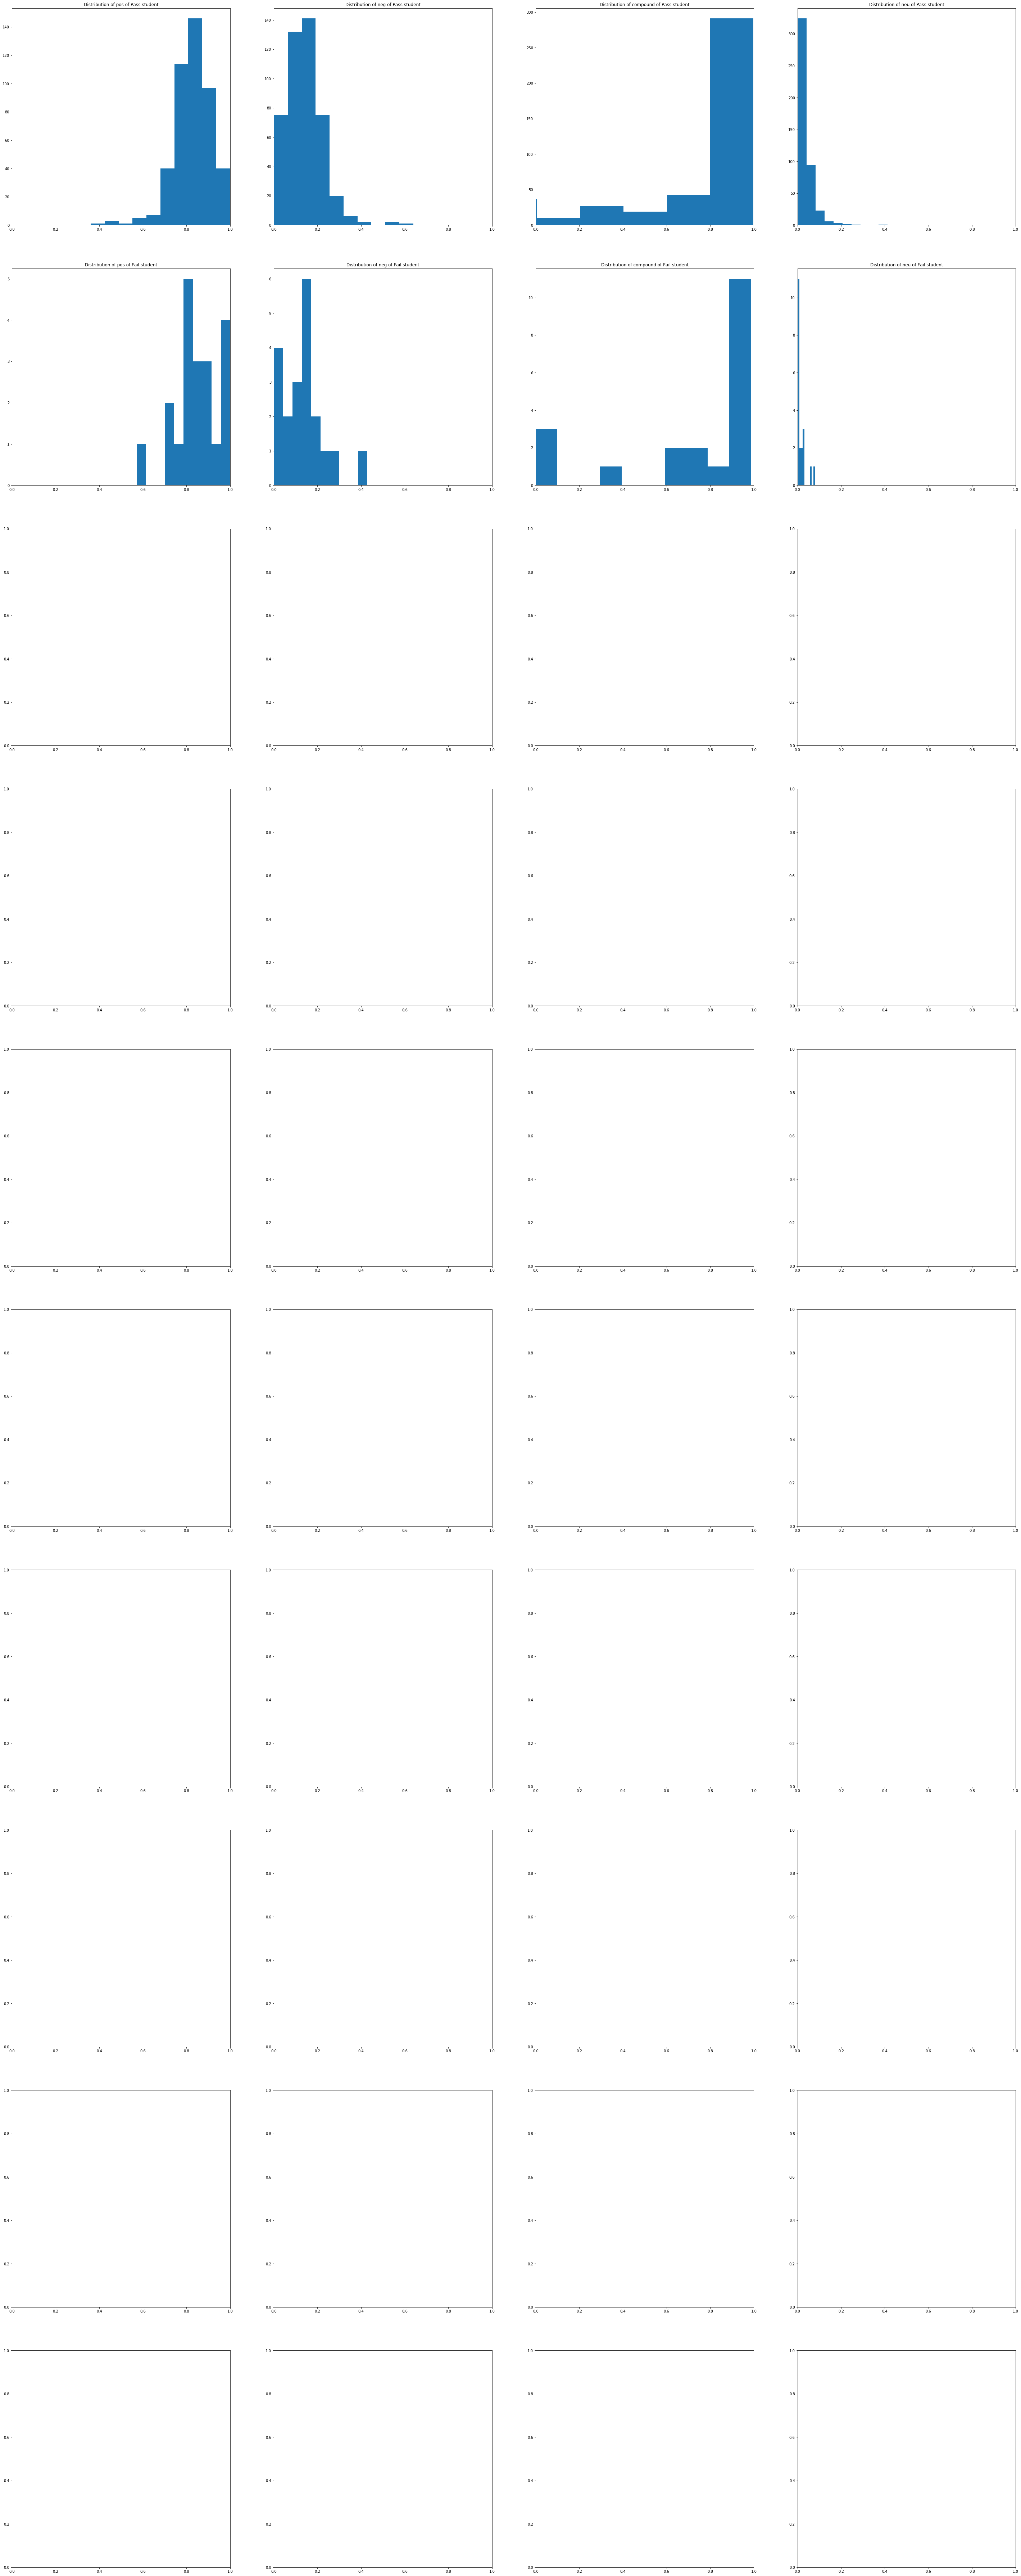

In [9]:
fig, axs = plt.subplots(10,4, figsize=(10,10))
plt.subplots_adjust(right = 4, top=10)


label_int = {0 : 'pos', 1 : 'neg', 2:'compound', 3 : 'neu'}
for i in range(0, 8):
    row = int(i/4)
    col = int(i%4)
    if (row == 0):
        name_group = "Pass student"
        ss_arr  = ss_arr_yes
    else:
        name_group = "Fail student"
        ss_arr = ss_arr_no
        
    axs[row][col].hist(np.array(ss_arr)[:,col])
    axs[row][col].set_title("Distribution of {} of {}".format(label_int[col], name_group))
    axs[row][col].set_xlim([0,1])
    

# Visualize length answers of 2 groups

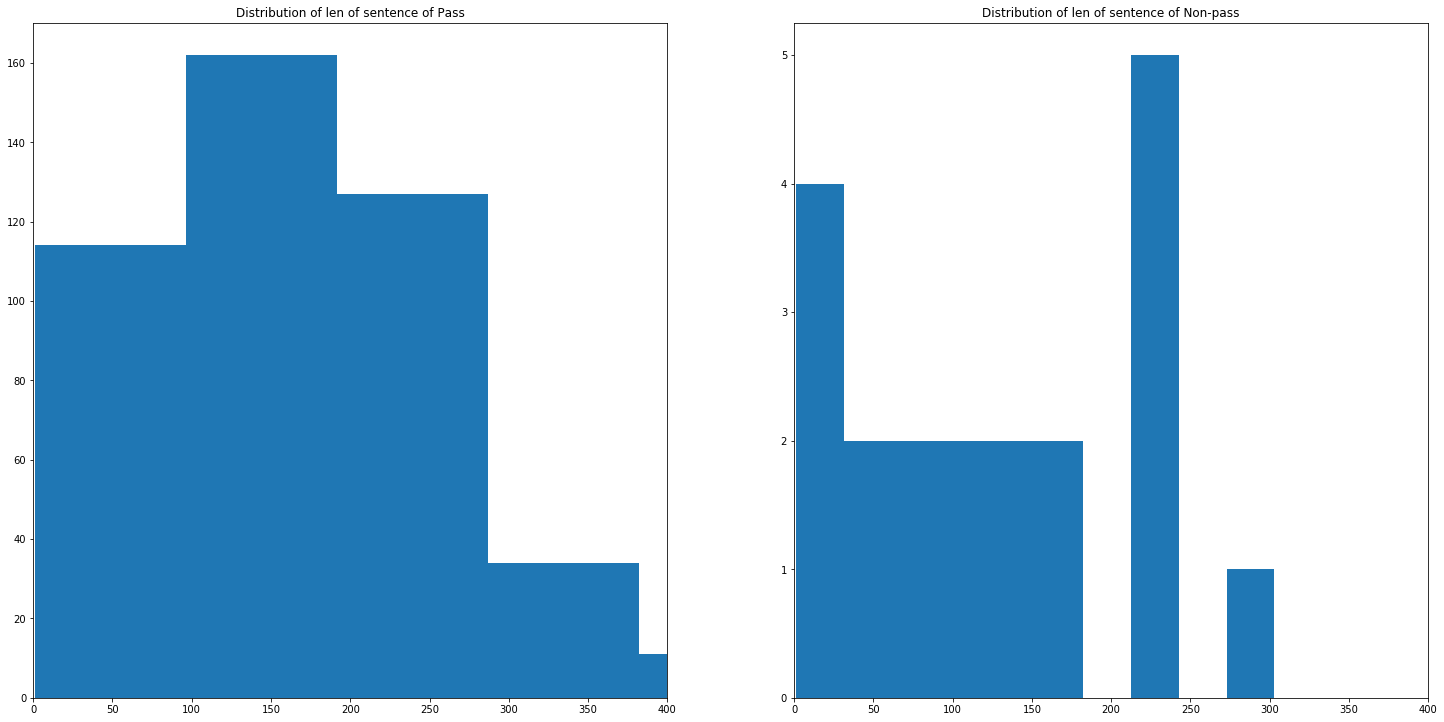

In [91]:
fig, axs = plt.subplots(1,2, figsize=(5,5))
plt.subplots_adjust(right = 4, top=2)

for i in range(0, 2):
    if i == 0:
        name_group = "Pass"
        arr = len_yes
    else:
        name_group = "Non-pass"
        arr = len_no
        
    axs[i].hist(arr)
    axs[i].set_title("Distribution of len of sentence of {}".format(name_group))
    axs[i].set_xlim([0,400])
    